## **Stylegan2-ADA**

In [1]:
# Run this for Google CoLab (use TensorFlow 1.x)
%tensorflow_version 1.x
#from google.colab import drive
#drive.mount('/content/drive', force_remount=True)

from google.colab import drive
drive.mount('/content/gdrive')

TensorFlow 1.x selected.
Mounted at /content/gdrive


In [2]:
!git clone https://github.com/NVlabs/stylegan2-ada.git

Cloning into 'stylegan2-ada'...
remote: Enumerating objects: 74, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 74 (delta 0), reused 1 (delta 0), pack-reused 71
Unpacking objects: 100% (74/74), done.


In [ ]:
!ls /content/stylegan2-ada/

calc_metrics.py  Dockerfile   LICENSE.txt   README.md	     train.py
dataset_tool.py  docs	      metrics	    style_mixing.py
dnnlib		 generate.py  projector.py  training


In [3]:
import sys
import pickle
import os
import numpy as np
import PIL.Image
from IPython.display import Image
import matplotlib.pyplot as plt
import cv2 

sys.path.insert(0, "/content/stylegan2-ada")

import dnnlib
import dnnlib.tflib as tflib

def seed2vec(Gs, seed):
  rnd = np.random.RandomState(seed)
  return rnd.randn(1, *Gs.input_shape[1:])

def init_random_state(Gs, seed):
  rnd = np.random.RandomState(seed) 
  noise_vars = [var for name, var in Gs.components.synthesis.vars.items() if name.startswith('noise')]
  tflib.set_vars({var: rnd.randn(*var.shape.as_list()) for var in noise_vars}) # [height, width]

def display_image(image):
  plt.axis('off')
  plt.imshow(image)
  plt.show()

def generate_image(Gs, z, truncation_psi):
    # Render images for dlatents initialized from random seeds.
    Gs_kwargs = {
        'output_transform': dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True),
        'randomize_noise': False
    }
    if truncation_psi is not None:
        Gs_kwargs['truncation_psi'] = truncation_psi

    label = np.zeros([1] + Gs.input_shapes[1][1:])
    images = Gs.run(z, label, **Gs_kwargs) # [minibatch, height, width, channel]
    return images[0]

In [9]:
import IPython.display

URL= "https://github.com/dilana95/anime/releases/download/anime/2020-01-11-skylion-stylegan2-animeportraits-networksnapshot-024664.pkl"
#URL = "https://archive.org/download/wikiart-stylegan2-conditional-model/WikiArt5.pkl"
#URL =" https://archive.org/download/wikiart-stylegan2-conditional-model/WikiArt_Uncond2.pkl"
#URL="https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada/pretrained/ffhq.pkl"
#URL="https://drive.google.com/uc?id=1MEGjdvVpUsu1jB4zrXZN7Y4kBBOzizDQ"
#URL = "https://github.com/jeffheaton/pretrained-gan-fish/releases/download/1.0.0/fish-gan-2020-12-09.pkl"
#URL = "https://github.com/jeffheaton/pretrained-merry-gan-mas/releases/download/v1/christmas-gan-2020-12-03.pkl"
#URL = "https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada/pretrained/ffhq.pkl"
tflib.init_tf()
print('Loading networks from "%s"...' % URL)
with dnnlib.util.open_url(URL) as fp:
    _G, _D, Gs = pickle.load(fp)

Loading networks from "https://github.com/dilana95/anime/releases/download/anime/2020-01-11-skylion-stylegan2-animeportraits-networksnapshot-024664.pkl"...


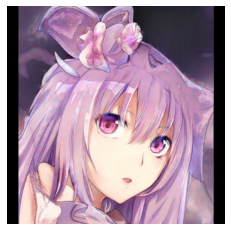

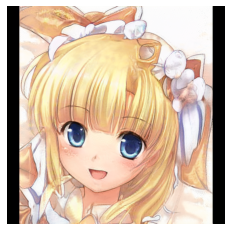

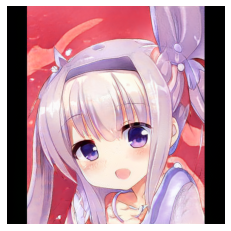

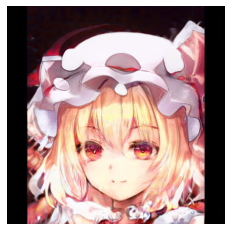

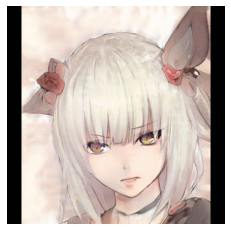

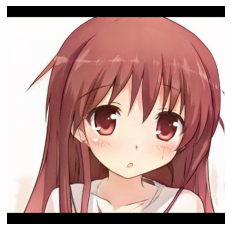

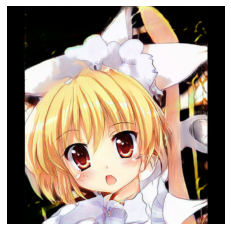

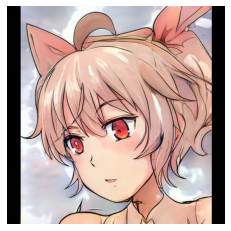

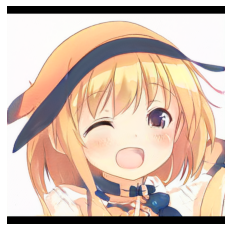

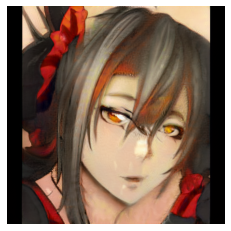

In [14]:
# Choose your own starting and ending seed.
SEED_FROM = 1995820010
SEED_TO = 1995820020
import cv2 
#import matplotlib.pyplot as plt

import skimage.io
import numpy as np

from matplotlib import pyplot as plt

x=0
# Generate the images for the seeds.
for i in range(SEED_FROM, SEED_TO):
  x=x+1
  #print(f"Seed {i}")
  init_random_state(Gs, 10)
  z = seed2vec(Gs, i)
  img = generate_image(Gs, z,0.8)
  display_image(img)
  #cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  #cv2.imwrite('/content/gdrive/MyDrive/generated_images/'+str(x)+'.png',cv2.cvtColor(img, cv2.COLOR_RGB2BGR))



# **Convert GDrive Folder to a zip file**

In [ ]:
from zipfile import ZipFile
import os

In [ ]:
file_paths = []

for root, directories, files in os.walk('/content/gdrive/MyDrive/generated_images'):
  for filename in files:
    filepath = os.path.join(root,filename)
    file_paths.append(filepath)

with ZipFile('/content/gdrive/MyDrive/images.zip','w') as zip:
  for file in file_paths:
    zip.write(file)